## Kaggle Notebook:
https://www.kaggle.com/code/naderyouhanna/task2-blip2/edit

In [1]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd


from transformers import Blip2Processor, Blip2ForConditionalGeneration

d:\Programs\Anaconda\Anaconda\envs\blip2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Hyperparameters

In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cpu'

### Dataset

In [3]:
# Load the CUB-200-2011 dataset
def load_cub_dataset(data_dir):
    images = pd.read_csv(os.path.join(data_dir, 'images.txt'), sep=' ', names=['image_id', 'file_path'])
    labels = pd.read_csv(os.path.join(data_dir, 'image_class_labels.txt'), sep=' ', names=['image_id', 'class_id'])
    classes = pd.read_csv(os.path.join(data_dir, 'classes.txt'), sep=' ', names=['class_id', 'class_name'])
    return images, labels, classes
data_dir = 'data'

images, labels, classes = load_cub_dataset(data_dir)

print(images.head())
print(labels.head())
print(classes.head())

print(images.shape)
print(labels.shape)
print(classes.shape)

   image_id                                          file_path
0         1  001.Black_footed_Albatross/Black_Footed_Albatr...
1         2  001.Black_footed_Albatross/Black_Footed_Albatr...
2         3  001.Black_footed_Albatross/Black_Footed_Albatr...
3         4  001.Black_footed_Albatross/Black_Footed_Albatr...
4         5  001.Black_footed_Albatross/Black_Footed_Albatr...
   image_id  class_id
0         1         1
1         2         1
2         3         1
3         4         1
4         5         1
   class_id                  class_name
0         1  001.Black_footed_Albatross
1         2        002.Laysan_Albatross
2         3         003.Sooty_Albatross
3         4       004.Groove_billed_Ani
4         5          005.Crested_Auklet
(11788, 2)
(11788, 2)
(200, 2)


## Task 2

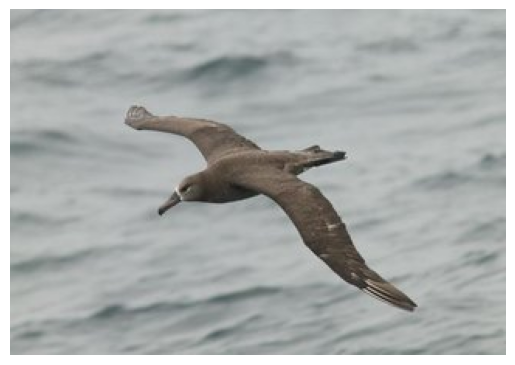

In [4]:
img_path = 'data/images/001.Black_footed_Albatross/Black_Footed_Albatross_0001_796111.jpg'
img = Image.open(img_path).convert('RGB')
plt.imshow(img)
plt.axis('off')
plt.show()

### BLIP-2

In [5]:
# blip_model_path = "Salesforce/blip2-opt-2.7b"
blip_model_path = "../BLIP-2"
blip_processor = Blip2Processor.from_pretrained(blip_model_path, trust_remote_code=True)

In [6]:
blip_model = Blip2ForConditionalGeneration.from_pretrained(blip_model_path)

Loading checkpoint shards: 100%|██████████| 2/2 [00:07<00:00,  3.55s/it]


In [7]:
def generate_blip_caption(image):
    inputs = blip_processor(image, return_tensors="pt")
    output = blip_model.generate(**inputs)
    return blip_processor.decode(output[0], skip_special_tokens=True)

In [8]:

blip_caption = generate_blip_caption(img)

print("BLIP-2 Caption:", blip_caption)


KeyboardInterrupt: 